In [1]:
# Importing the libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing our Database

df = pd.read_csv('index.csv')
df.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# Checking infos of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2838 non-null   object 
 1   datetime     2838 non-null   object 
 2   cash_type    2838 non-null   object 
 3   card         2749 non-null   object 
 4   money        2838 non-null   float64
 5   coffee_name  2838 non-null   object 
dtypes: float64(1), object(5)
memory usage: 133.2+ KB


In [7]:
# There is no null value so starting our analysis
# First we gonna check what are the products and how many sells we had
products = df['coffee_name'].value_counts()
products = products.reset_index()

<Axes: xlabel='count', ylabel='coffee_name'>

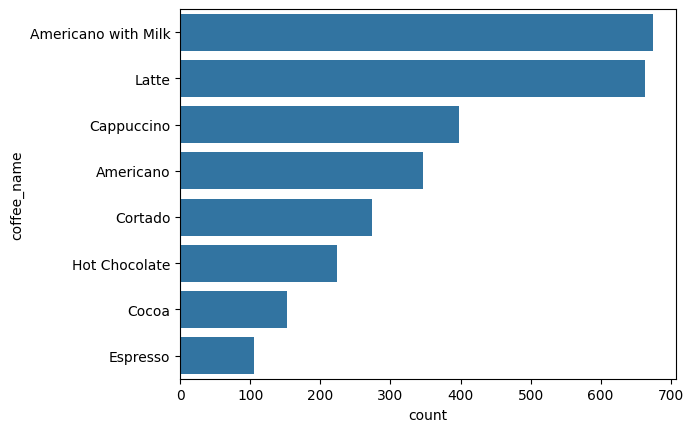

In [9]:
# Lets se a graphic of it
sns.barplot(products, y='coffee_name', x= 'count')

In [22]:
# Now lets see the revenue 
total_revenue = df['money'].sum()
individual_revenue = df.groupby('coffee_name')['money'].sum()
individual_revenue = individual_revenue.sort_values()
individual_revenue = individual_revenue.reset_index()
individual_revenue

,coffee_name,money
0,Espresso,2203.54
1,Cocoa,5459.76
2,Cortado,7067.58
3,Hot Chocolate,8098.38
4,Americano,9065.50
5,Cappuccino,14350.86
6,Americano with Milk,20640.12
7,Latte,23610.86


<Axes: xlabel='money', ylabel='coffee_name'>

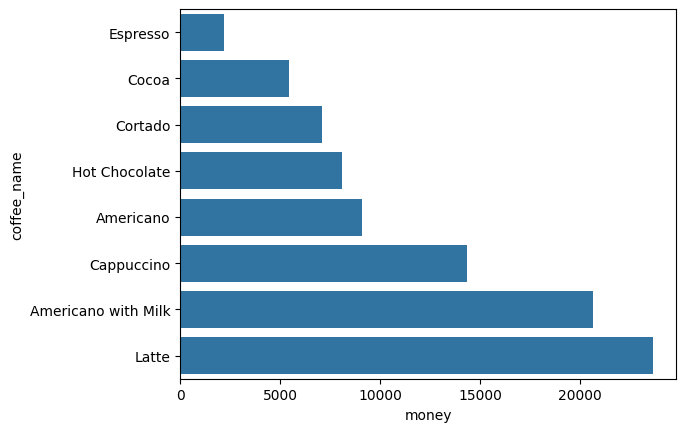

In [23]:
# Now lets also see that individual revenue graphic
sns.barplot(individual_revenue, y= 'coffee_name', x='money')

In [27]:
# Now let's discover some important data relative to the date
# First we're gonna find which month had most sales
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.strftime('%B')
df['week_day'] = df['datetime'].dt.strftime('%A')
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,week_day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,March,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,March,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,March,Friday


<Axes: xlabel='count', ylabel='month'>

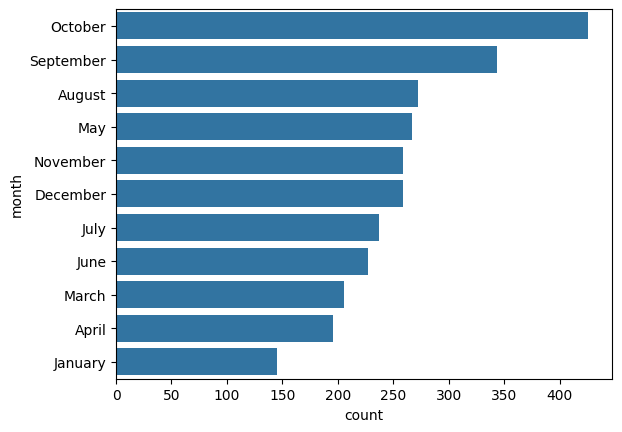

In [29]:
# Now lets also see that month sales graphic
months = df['month'].value_counts().reset_index()
sns.barplot(months,y= 'month', x= 'count')

<Axes: xlabel='count', ylabel='week_day'>

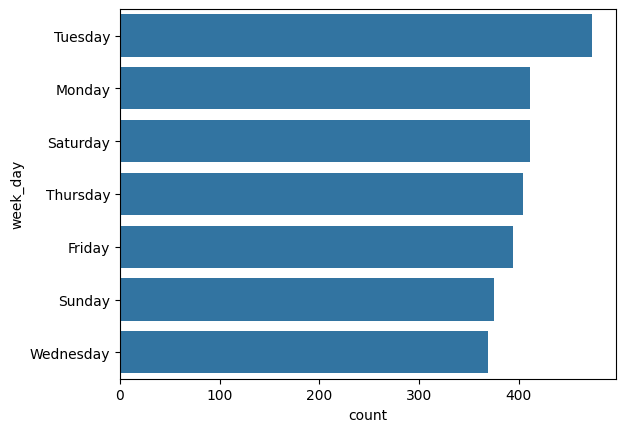

In [44]:
# Now lets also see that week day sales graphic
week_days = df['week_day'].value_counts().reset_index()
sns.barplot(week_days,y= 'week_day', x= 'count')